In [17]:
#======================================
#|        Data Cleaning Step          |
#======================================

# ===============================
# 1. Import required libraries
# ===============================

import pandas as pd
import numpy as np


# ===============================
# 2. Load the dataset
# ===============================

df = pd.read_csv('default of credit card clients.csv', sep=';')

# Preview the first rows
print(df.head())

# First cleaning data
new_cols = df.iloc[0].tolist()
df = df.iloc[1:].reset_index(drop=True)
df.columns = new_cols

# Convert relevant columns to numeric types
numeric_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                'default payment next month']

for col in numeric_cols:
    # Convert to numeric, coercing errors will turn non-convertible values into NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.head())

# ===============================
# 3. Inspect dataset structure
# ===============================
print("Dataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nNumber of duplicated rows:", df.duplicated().sum())

#================================
# 4. Cleaning dataset
#================================

#replace the out-of-context data in the marriage column
df['MARRIAGE'] = df['MARRIAGE'].replace({0:3})

#replace out-of-range values ​​from PAY_X
for col in ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']:
    df[col] = df[col].clip(-2, 8)

#check the consistency of the BILL_AMT and PAY_AMT columns
bill_cols = [c for c in df.columns if "BILL_AMT" in c]
pay_cols = [c for c in df.columns if "PAY_AMT" in c]

for col in bill_cols + pay_cols:
    df[col] = df[col].clip(lower=0)

#AGE column normalization
df['AGE'] = df['AGE'].clip(18, 80)

#delete ID column
df = df.drop(columns=['ID'])

#check for duplicates
df = df.drop_duplicates()

#Inspect dataset structure

print("Dataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nNumber of duplicated rows:", df.duplicated().sum())

# ===============================
# 4. Save Cleaned Dataset
# ===============================
df.to_csv("default_of_credit_card_clients_clean.csv", index=False)
print("\n💾 Clean dataset saved as default_of_credit_card_clients_clean.csv")

  Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23             

Statistical Summary:


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,1.603738,1.853629,1.557283,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,...,43350.075722,40394.067212,38987.603004,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.221258
std,129760.135222,0.489128,0.790411,0.521431,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,...,64315.565829,60786.541344,59465.867303,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101
min,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


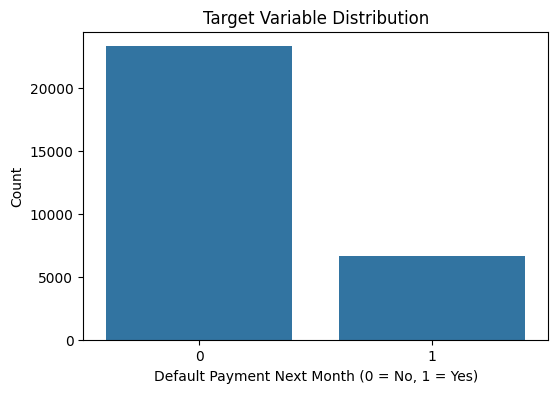

📌 Default Rate: 22.13%


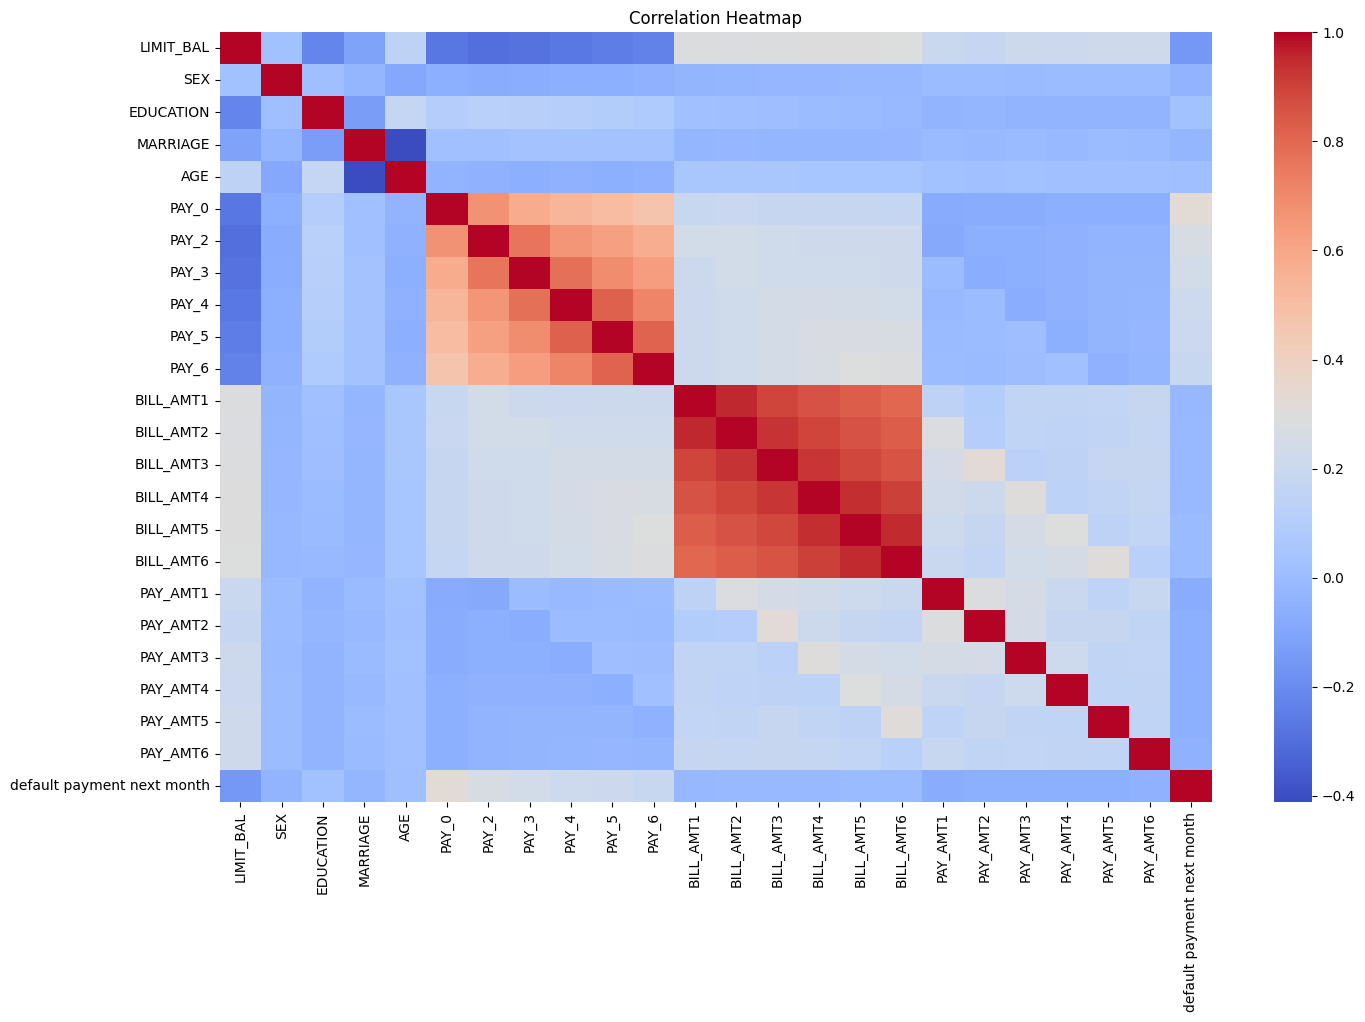

In [18]:
#======================================
#|      Exploratory Data Analysis     |
#======================================

import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 1. Basic statistical summary
# ===============================
print("Statistical Summary:")
display(df.describe())

# ===============================
# 2. Distribution of target variable
# ===============================
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='default payment next month')
plt.title("Target Variable Distribution")
plt.xlabel("Default Payment Next Month (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Percentage default
default_rate = df['default payment next month'].mean() * 100
print(f"📌 Default Rate: {default_rate:.2f}%")

# ===============================
# 3. Correlation heatmap
# ===============================
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [19]:
#============================================
#|   Feature Engineering & Data Preparation |
#============================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ===============================
# 1. Feature / Target separation
# ===============================
X = df.drop(columns=["default payment next month"])
y = df["default payment next month"]

# ===============================
# 2. Train-test split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ===============================
# 3. Scaling numerical features
# ===============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Scaling Completed ✔")

Data Scaling Completed ✔


📌 Accuracy: 0.8134

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5834
           1       0.73      0.25      0.37      1658

    accuracy                           0.81      7492
   macro avg       0.78      0.61      0.63      7492
weighted avg       0.80      0.81      0.78      7492



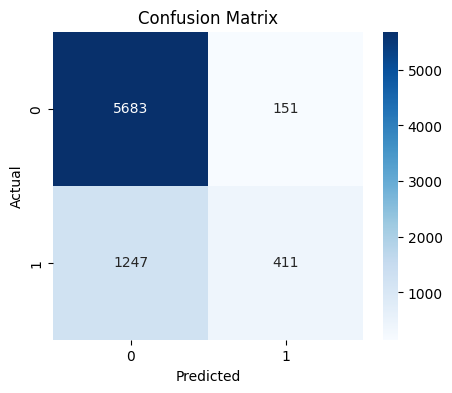

In [20]:
#======================================
#|      Machine Learning Models       |
#======================================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ===============================
# 1. Logistic Regression Model
# ===============================
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# ===============================
# 2. Evaluation
# ===============================

acc = accuracy_score(y_test, y_pred)
print(f"📌 Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()